In [11]:
from main import visualize, train_model
import pandas as pd

In [12]:
train_data = pd.read_csv("datasets/training_set.csv", index_col=0)
test_data = pd.read_csv("datasets/test_set.csv", index_col=0)

In [13]:
train_targets = train_data["Y"]
train_features = train_data.drop(["Y"], axis=1)

In [22]:
visualize(train_data, test_data, train_features)

     X1    X2    X3     X4    X5    X6    X7    X8   X9   X10  ...  X49  \
0  0.00  0.00  4.34   0.00  0.00  0.00  0.00  0.00  0.0  0.00  ...  0.0   
1  0.00  0.56  0.56   0.00  1.12  0.56  2.25  0.00  0.0  0.56  ...  0.0   
2  0.00  0.00  0.00   0.00  0.00  0.00  0.00  0.00  0.0  0.00  ...  0.0   
3  0.64  0.00  0.64   0.00  1.93  0.00  0.00  0.00  0.0  0.00  ...  0.0   
4  0.58  0.00  0.00  35.46  0.58  0.00  0.58  0.58  0.0  0.00  ...  0.0   

     X50  X51    X52    X53    X54     X55  X56  X57  Y  
0  0.000  0.0  1.342  0.000  0.000   1.200    2   12  0  
1  0.083  0.0  0.503  0.000  0.083  16.304  148  375  1  
2  0.000  0.0  0.000  0.000  0.000   1.000    1    5  0  
3  0.000  0.0  0.462  0.370  0.000   2.440   22  122  1  
4  0.000  0.0  0.239  0.239  0.000   3.338  123  207  1  

[5 rows x 58 columns]
                X1           X2           X3           X4           X5  \
count  3910.000000  3910.000000  3910.000000  3910.000000  3910.000000   
mean      0.102990     0.20641

                                             |          | [  0%]   00:00 -> (? left)

c:\Users\SK4R\anaconda3\envs\fastest\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
c:\Users\SK4R\anaconda3\envs\fastest\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
c:\Users\SK4R\anaconda3\envs\fastest\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
c:\Users\SK4R\anaconda3\envs\fastest\lib\site-packages\sweetviz\graph_associations.py:22

Report visualizations/train_set_analysis.html was generated.


                                             |          | [  0%]   00:00 -> (? left)

c:\Users\SK4R\anaconda3\envs\fastest\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
c:\Users\SK4R\anaconda3\envs\fastest\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
c:\Users\SK4R\anaconda3\envs\fastest\lib\site-packages\sweetviz\graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
c:\Users\SK4R\anaconda3\envs\fastest\lib\site-packages\sweetviz\graph_associations.py:22

Report visualizations/comparitive_analysis.html was generated.


# Analysis Can be found here

- visualizations\train_set_analysis.html
- visualizations\comparitive_analysis.html

# Train a model with the full dataset (Logistic Regression)

In [14]:
train_model(train_targets, train_features, 800)

[[450  23]
 [ 34 275]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       473
           1       0.92      0.89      0.91       309

    accuracy                           0.93       782
   macro avg       0.93      0.92      0.92       782
weighted avg       0.93      0.93      0.93       782



# Trying Neural Networks

In [15]:
import torch
from src.classifier import Classifier
import numpy as np

In [16]:
model = Classifier(
    input_size=train_features.shape[1], hidden_size=800, output_size=1
)

In [17]:
print(model)

Classifier(
  (fc1): Linear(in_features=57, out_features=800, bias=True)
  (fc_hidden): Linear(in_features=800, out_features=800, bias=True)
  (fc2): Linear(in_features=800, out_features=1, bias=True)
)


In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.show()

def plot_losses(train_losses, val_losses):
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Val Loss")
    plt.legend()
    plt.show()

In [19]:
from sklearn.model_selection import train_test_split

def train_model(train_targets, train_features, epochs):
    X_train, X_test, y_train, y_test = train_test_split(
        train_features, train_targets, test_size=0.2, random_state=42
    )
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss_func = torch.nn.BCEWithLogitsLoss()
    train_losses = []
    val_losses = []
    best_val_loss = np.inf
    for epoch in range(epochs):
        outputs = model(torch.tensor(X_train, dtype=torch.float32))
        loss = loss_func(outputs, torch.tensor(y_train, dtype=torch.float32))
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_losses.append(loss.item())
        print(f"Epoch: {epoch}, Loss: {loss}")
        with torch.no_grad():
            model.eval()
            outputs = model(torch.tensor(X_test, dtype=torch.float32))
            loss = loss_func(outputs, torch.tensor(y_test, dtype=torch.float32))
            val_losses.append(loss.item())
            if loss < best_val_loss:
                best_val_loss = loss
                torch.save(model.state_dict(), "models/model.pt")
            print(f"Epoch: {epoch}, Val Loss: {loss}")
            # print(outputs)
            model.train()

    print(f"Best Val Loss: {best_val_loss}")
    model.load_state_dict(torch.load("models/model.pt"))
    with torch.no_grad():
        model.eval()
        outputs = model(torch.tensor(X_test, dtype=torch.float32))
        loss = loss_func(outputs, torch.tensor(y_test, dtype=torch.float32))
        print(f"Test Loss: {loss}")
        y_pred = (outputs > 0).float()
        accuracy = (y_pred == torch.tensor(y_test, dtype=torch.float32)).float().mean()
        print(f"Test Accuracy: {accuracy}")
        f1_score = (2 * y_pred * torch.tensor(y_test, dtype=torch.float32)).sum() / (
            2 * y_pred.sum() + torch.tensor(y_test, dtype=torch.float32).sum()
        )

    print(f"Confusion Matrix:")
    plot_confusion_matrix(y_test, y_pred)
    plot_losses(train_losses, val_losses)
    return train_losses, val_losses

Epoch: 0, Loss: 0.24449630081653595
Epoch: 0, Val Loss: 12.59362506866455
Epoch: 1, Loss: 9.92924976348877
Epoch: 1, Val Loss: 4.671283721923828
Epoch: 2, Loss: 3.523714780807495
Epoch: 2, Val Loss: 9.795487403869629
Epoch: 3, Loss: 9.958457946777344
Epoch: 3, Val Loss: 4.419434070587158
Epoch: 4, Loss: 4.394044876098633
Epoch: 4, Val Loss: 3.0255279541015625
Epoch: 5, Loss: 2.2853825092315674
Epoch: 5, Val Loss: 6.160305976867676
Epoch: 6, Loss: 4.789246559143066
Epoch: 6, Val Loss: 6.995713710784912
Epoch: 7, Loss: 5.493916988372803
Epoch: 7, Val Loss: 5.962579727172852
Epoch: 8, Loss: 4.711627006530762
Epoch: 8, Val Loss: 3.421342134475708
Epoch: 9, Loss: 2.757751703262329
Epoch: 9, Val Loss: 0.5679687857627869
Epoch: 10, Loss: 0.7206012010574341
Epoch: 10, Val Loss: 2.2935116291046143
Epoch: 11, Loss: 3.166278839111328
Epoch: 11, Val Loss: 2.057769775390625
Epoch: 12, Loss: 2.955012321472168
Epoch: 12, Val Loss: 0.5541418790817261
Epoch: 13, Loss: 0.9639955163002014
Epoch: 13, Val 

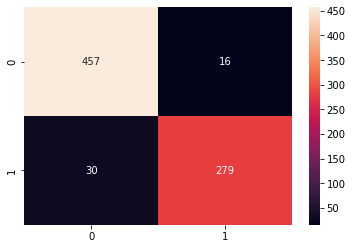

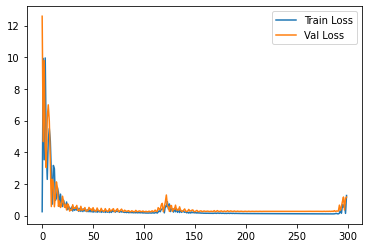

In [21]:
train_losses, val_losses = train_model(train_targets.values[..., np.newaxis], train_features.values, 300)